In [39]:
import pandas as pd

In [40]:
text = pd.read_csv(r'C:\Users\user\Desktop\ОРП\pandas\text.csv')
print(text)

       WORDNO          WORD
0           1    katekizmas
1           2          arba
2           3       mokslas
3           4    kiekvienam
4           5  krikščioniui
...       ...           ...
16575   16576         amžių
16576   16577        amžinų
16577   16578             ,
16578   16579          amen
16579   16580             .

[16580 rows x 2 columns]


In [41]:
vocab = pd.read_csv(r'C:\Users\user\Desktop\ОРП\pandas\vocab.csv')
print(vocab)

          WORD  POS
0          ***  ***
1            ,    -
2            -    -
3            .    -
4            ?    -
...        ...  ...
3963      žymę  NaN
3964  žyminame    V
3965   žynauja    V
3966    žyvate  NaN
3967    žyvato  NaN

[3968 rows x 2 columns]


In [42]:
'''Соединение по столбцу WORD'''

df = pd.merge(text, vocab, how = 'outer', on = 'WORD')
print(df)

       WORDNO               WORD  POS
0           1         katekizmas  NaN
1           2               arba   KO
2         678               arba   KO
3         702               arba   KO
4         837               arba   KO
...       ...                ...  ...
19417   16543          pataisyti    V
19418   16552            pildymo  NaN
19419   16556         atitraukti    V
19420   16562  didėsės?didesnės?  NaN
19421   16567        nuplatinimo  NaN

[19422 rows x 3 columns]


In [43]:
df_clean = df.dropna()
print(df_clean)

       WORDNO                      WORD POS
1           2                      arba  KO
2         678                      arba  KO
3         702                      arba  KO
4         837                      arba  KO
5        1052                      arba  KO
...       ...                       ...  ..
19413   16523                užsilaikyk   V
19415   16529  užmirštumbei,užmirštumei   V
19416   16535                pramitinsi   V
19417   16543                 pataisyti   V
19419   16556                atitraukti   V

[16509 rows x 3 columns]


In [44]:
df.describe

<bound method NDFrame.describe of        WORDNO               WORD  POS
0           1         katekizmas  NaN
1           2               arba   KO
2         678               arba   KO
3         702               arba   KO
4         837               arba   KO
...       ...                ...  ...
19417   16543          pataisyti    V
19418   16552            pildymo  NaN
19419   16556         atitraukti    V
19420   16562  didėsės?didesnės?  NaN
19421   16567        nuplatinimo  NaN

[19422 rows x 3 columns]>

In [72]:
'''Фильтрация строк, которые следуют за строкой с таким же значением POS'''

row = [each for each in df.iterrows()]
#print(row)

pd.DataFrame([each[1] for i, each in enumerate(row) if row[i][1]['POS'] == row[i-1][1]['POS']])

,WORDNO,WORD,POS,MEAN
2,678,arba,KO,NaN
3,702,arba,KO,NaN
4,837,arba,KO,NaN
5,1052,arba,KO,NaN
6,1202,arba,KO,NaN
...,...,...,...,...
19403,16470,pernakvoti,V,7.9
19409,16506,teiksiesi,V,8.3
19413,16523,užsilaikyk,V,8.7
19416,16535,pramitinsi,V,10.5


In [65]:
'''Нахождение среднего значения длины слова и группировка по полю POS'''

df['MEAN'] = df['WORD'].agg(lambda x: len(x)).rolling(10).mean()

group_pos = df.groupby('POS')
print(group_pos)

for group in group_pos:
    print(group)

('***',        WORDNO  WORD  POS  MEAN
11831     865     m  ***   6.0
11833    1028     m  ***   4.8
11835    1340     m  ***   3.6
11837    1529     m  ***   2.5
11839    1997     m  ***   1.5
11841    2028     m  ***   1.0
11843    2127     m  ***   1.0
11845    3082     m  ***   1.0
11847    3919     m  ***   1.0
11849    5025     m  ***   1.0
11851    5055     m  ***   1.0
11853    5475     m  ***   1.0
11855    8375     m  ***   1.0
12144    1036    mo  ***   6.4
12147    1741    mo  ***   5.2
12150    1812    mo  ***   3.6
12153    2187    mo  ***   2.0
12156    3472    mo  ***   2.0
12159    3993    mo  ***   2.0
12162    6750    mo  ***   2.0
12320    1125     →  ***   5.7
12321    2457     →  ***   5.3
13881    2299  ižga  ***   5.6
13882    2301  nimo  ***   5.6
15030    3772     ¶  ***   7.9
15031    4084     ¶  ***   7.1
15032    4320     ¶  ***   6.4
15033    7523     ¶  ***   5.8
15034    8910     ¶  ***   5.0
15035    9491     ¶  ***   4.2
15036    9665     ¶  ***   3.4


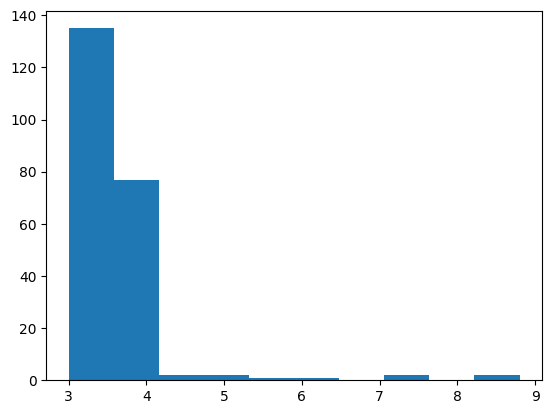

In [150]:
ser = group_pos.get_group('VA')['WORD'].agg(lambda x: len(x)).rolling(5).mean()
#plt.figure()
x = plt.hist(ser)

In [47]:
'''Среднее, представленное в Series'''

for each in group_pos:
   mean_word = each[1]['WORD'].agg(lambda x: len(x)).rolling(5).mean()
   print(mean_word)

11831    NaN
11833    NaN
11835    NaN
11837    NaN
11839    1.0
11841    1.0
11843    1.0
11845    1.0
11847    1.0
11849    1.0
11851    1.0
11853    1.0
11855    1.0
12144    1.2
12147    1.4
12150    1.6
12153    1.8
12156    2.0
12159    2.0
12162    2.0
12320    1.8
12321    1.6
13881    2.0
13882    2.4
15030    2.2
15031    2.2
15032    2.2
15033    1.6
15034    1.0
15035    1.0
15036    1.0
15037    1.0
15038    1.0
15732    1.0
16300    1.0
16301    1.0
18909    1.4
Name: WORD, dtype: float64
77       NaN
78       NaN
79       NaN
80       NaN
81       1.0
        ... 
18660    3.6
18904    4.4
18908    4.6
19024    5.4
19190    4.6
Name: WORD, Length: 3982, dtype: float64
12676    NaN
12678    NaN
12680    NaN
12682    NaN
12684    1.0
12686    1.0
12688    1.0
12690    1.0
12692    1.0
12694    1.0
12696    1.0
12698    1.0
12700    1.0
12702    1.0
12704    1.0
12706    1.0
12708    1.0
12710    1.0
12712    1.0
12714    1.0
12716    1.0
12718    1.0
12720    1.0
12722    

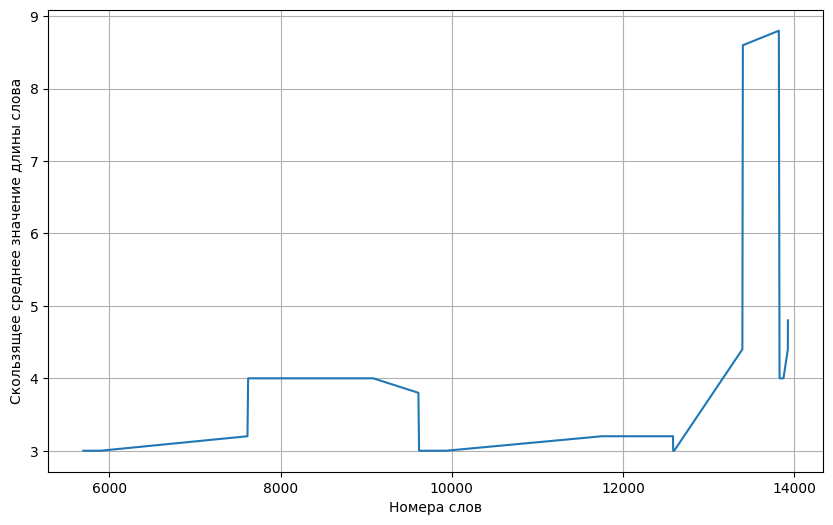

In [76]:
'''Визуализация по номеру слов'''

import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
plt.plot(mean_word)
plt.grid(True)
plt.xlabel('Номера слов')
plt.ylabel('Скользящее среднее значение длины слова')
plt.savefig('fig_min.png')

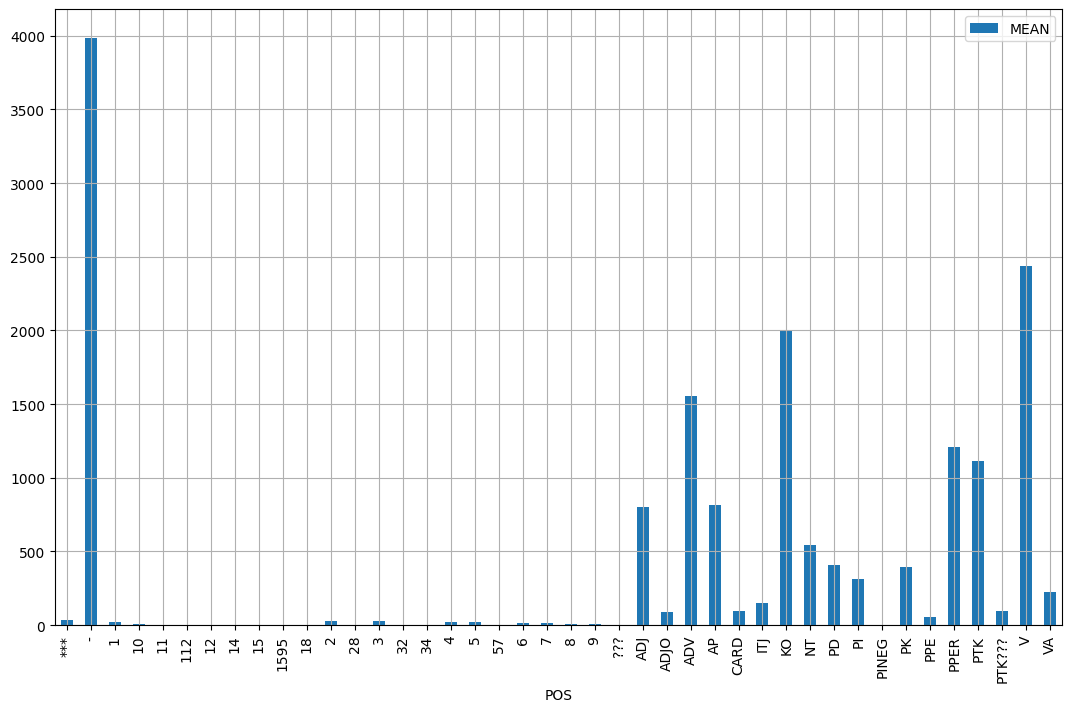

In [80]:
'''Визуализация по группе POS'''

df[['POS', 'MEAN']].groupby('POS').count().plot(kind='bar', figsize=(13, 8), legend=True)
plt.grid(True)
plt.savefig('fig_pos.png')

In [78]:
'''Сохранение таблицы в html'''

df.to_html('table.html', index=False)